In [229]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree , DecisionTreeClassifier
import matplotlib.pyplot as plt

In [230]:
def readData():
    data = pd.read_csv('bankloan.csv')
    return data

In [231]:
data = readData()
print(data.shape)
data.head()

(5000, 14)


,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Securities.Account,CD.Account,Online,CreditCard,Personal.Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0


In [232]:
def splitData(data):
    x = data.values[:, 1:13]
    y = data.values[:, 13]
    xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3, random_state=100)
 
    return x, y, xTrain, xTest, yTrain, yTest

In [233]:
def train(xTrain , yTrain):
    forest = RandomForestClassifier(n_estimators = 1000, criterion='gini', random_state = 100)
    forest.fit(xTrain , yTrain)
    return forest

In [234]:
def prediction(xTest, forest):
    yPred = forest.predict(xTest)
    return yPred

In [235]:
def calAccuracy(yTest, yPred):
    accuracy = accuracy_score(yTest, yPred) * 100
    return accuracy

In [236]:
x, y, xTrain, xTest, yTrain, yTest = splitData(data)

forest = train(xTrain, yTrain)
pred = prediction([[20, 0 , 130 , 92222 , 1 , 1.6 , 6 , 0, 1, 0, 0 ,0]] , forest)
print(pred)

[1.]


In [237]:
yPred = prediction(xTest , forest)
print('Accuracy of Forest:' , calAccuracy(yTest , yPred))

Accuracy of Forest: 98.26666666666667


In [242]:
def plotDecisionTree(forest, treeNumber, att, target):
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
    plot_tree(forest.estimators_[treeNumber - 1],feature_names = att, class_names=target, filled = True);
    fig.savefig(f'tree_{treeNumber}.png')

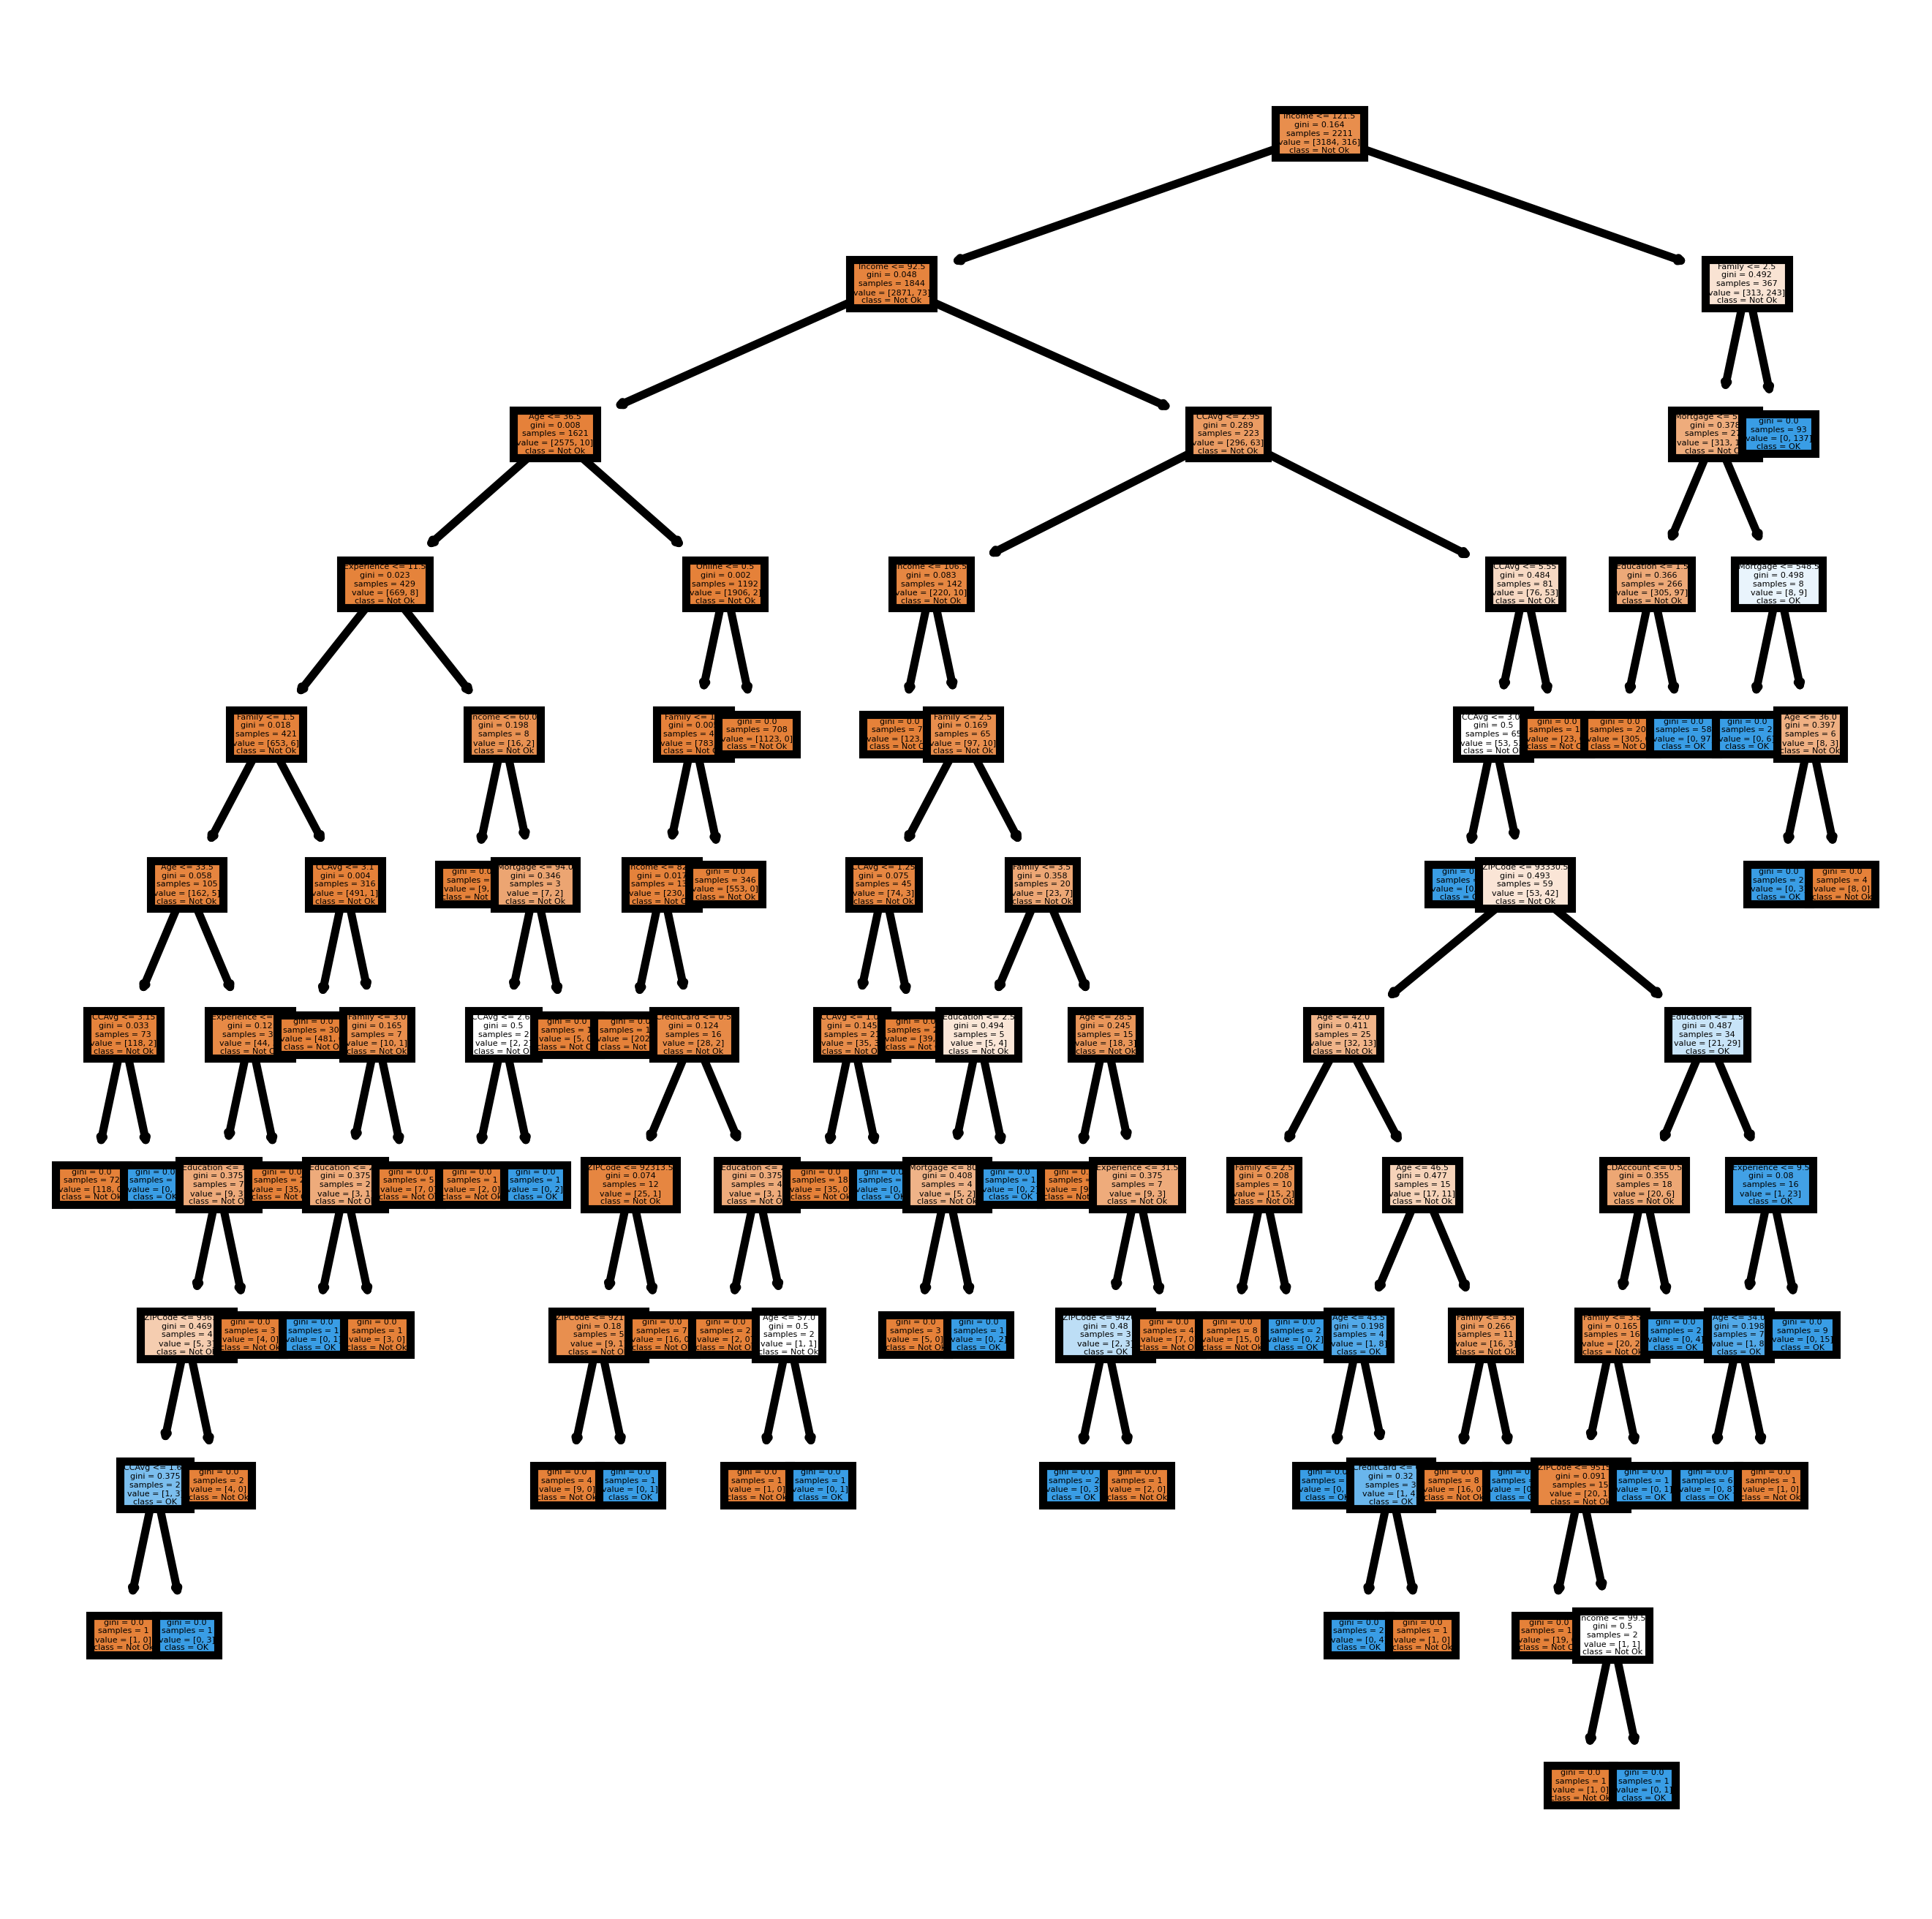

In [243]:
plotDecisionTree(forest, 5, ['Age', 'Experience' , 'Income' , 'ZIPCode' , 'Family' , 'CCAvg' , 'Education', 'Mortgage' , 'SecuritiesAccount' , 'CDAccount' , 'Online' , 'CreditCard'] , ['Not Ok' , 'OK'])

In [250]:
colList = ['Age', 'Experience' , 'Income' , 'ZIPCode' , 'Family' , 'CCAvg' , 'Education', 'Mortgage' , 'SecuritiesAccount' , 'CDAccount' , 'Online' , 'CreditCard']
importances = list(forest.feature_importances_)
i = 0
for col in colList:
    print(f'Variable: {colList[i]} : Importance: {round(importances[i] * 100 , 2)}%')
    i = i + 1

Variable: Age : Importance: 3.5%
Variable: Experience : Importance: 3.44%
Variable: Income : Importance: 33.7%
Variable: ZIPCode : Importance: 3.64%
Variable: Family : Importance: 9.99%
Variable: CCAvg : Importance: 16.41%
Variable: Education : Importance: 19.38%
Variable: Mortgage : Importance: 3.06%
Variable: SecuritiesAccount : Importance: 0.42%
Variable: CDAccount : Importance: 4.71%
Variable: Online : Importance: 0.81%
Variable: CreditCard : Importance: 0.93%
